In [1]:
# install required packages
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy 


In [2]:
# import libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#specify matplotlib figure sizes & kernel
%matplotlib notebook
plt.rcParams['figure.figsize'] = [20, 20]

# add project root folder to path to allow import local modules
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
# import local modules
from helpers import load_csv

In [3]:
# load data in numpy structured array
data = load_csv("../dataset/trainset.csv")

In [4]:
# convert to pandas dataframe for vis
df =pd.DataFrame(data).set_index('Id')

In [5]:
# show df
df.head()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
Id,,,,,,,,,,,,,,,,,,,,,
192847,0,-999.000,90.100,44.395,1.774,-999.000,-999.000,-999.000,1.377,1.774,...,-2.237,93.023,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.00,0.000
254329,0,28.478,52.063,21.773,54.510,-999.000,-999.000,-999.000,0.681,4.461,...,-3.022,138.790,1,50.076,1.173,2.079,-999.000,-999.000,-999.00,50.076
315049,0,74.538,119.834,66.795,44.244,0.658,28.226,-0.094,1.686,26.519,...,1.335,250.953,2,40.099,0.209,0.830,31.023,-0.449,0.57,71.123
190326,1,132.353,21.708,82.885,46.428,-999.000,-999.000,-999.000,2.634,12.341,...,-2.588,173.658,1,38.996,-0.825,1.559,-999.000,-999.000,-999.00,38.996
182910,1,119.640,21.306,84.493,108.251,-999.000,-999.000,-999.000,1.746,3.279,...,3.110,262.518,1,105.587,1.974,-0.436,-999.000,-999.000,-999.00,105.587


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225000 entries, 192847 to 141824
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Prediction                   225000 non-null  int32  
 1   DER_mass_MMC                 225000 non-null  float64
 2   DER_mass_transverse_met_lep  225000 non-null  float64
 3   DER_mass_vis                 225000 non-null  float64
 4   DER_pt_h                     225000 non-null  float64
 5   DER_deltaeta_jet_jet         225000 non-null  float64
 6   DER_mass_jet_jet             225000 non-null  float64
 7   DER_prodeta_jet_jet          225000 non-null  float64
 8   DER_deltar_tau_lep           225000 non-null  float64
 9   DER_pt_tot                   225000 non-null  float64
 10  DER_sum_pt                   225000 non-null  float64
 11  DER_pt_ratio_lep_tau         225000 non-null  float64
 12  DER_met_phi_centrality       225000 non-null  float64

<IPython.core.display.Javascript object>


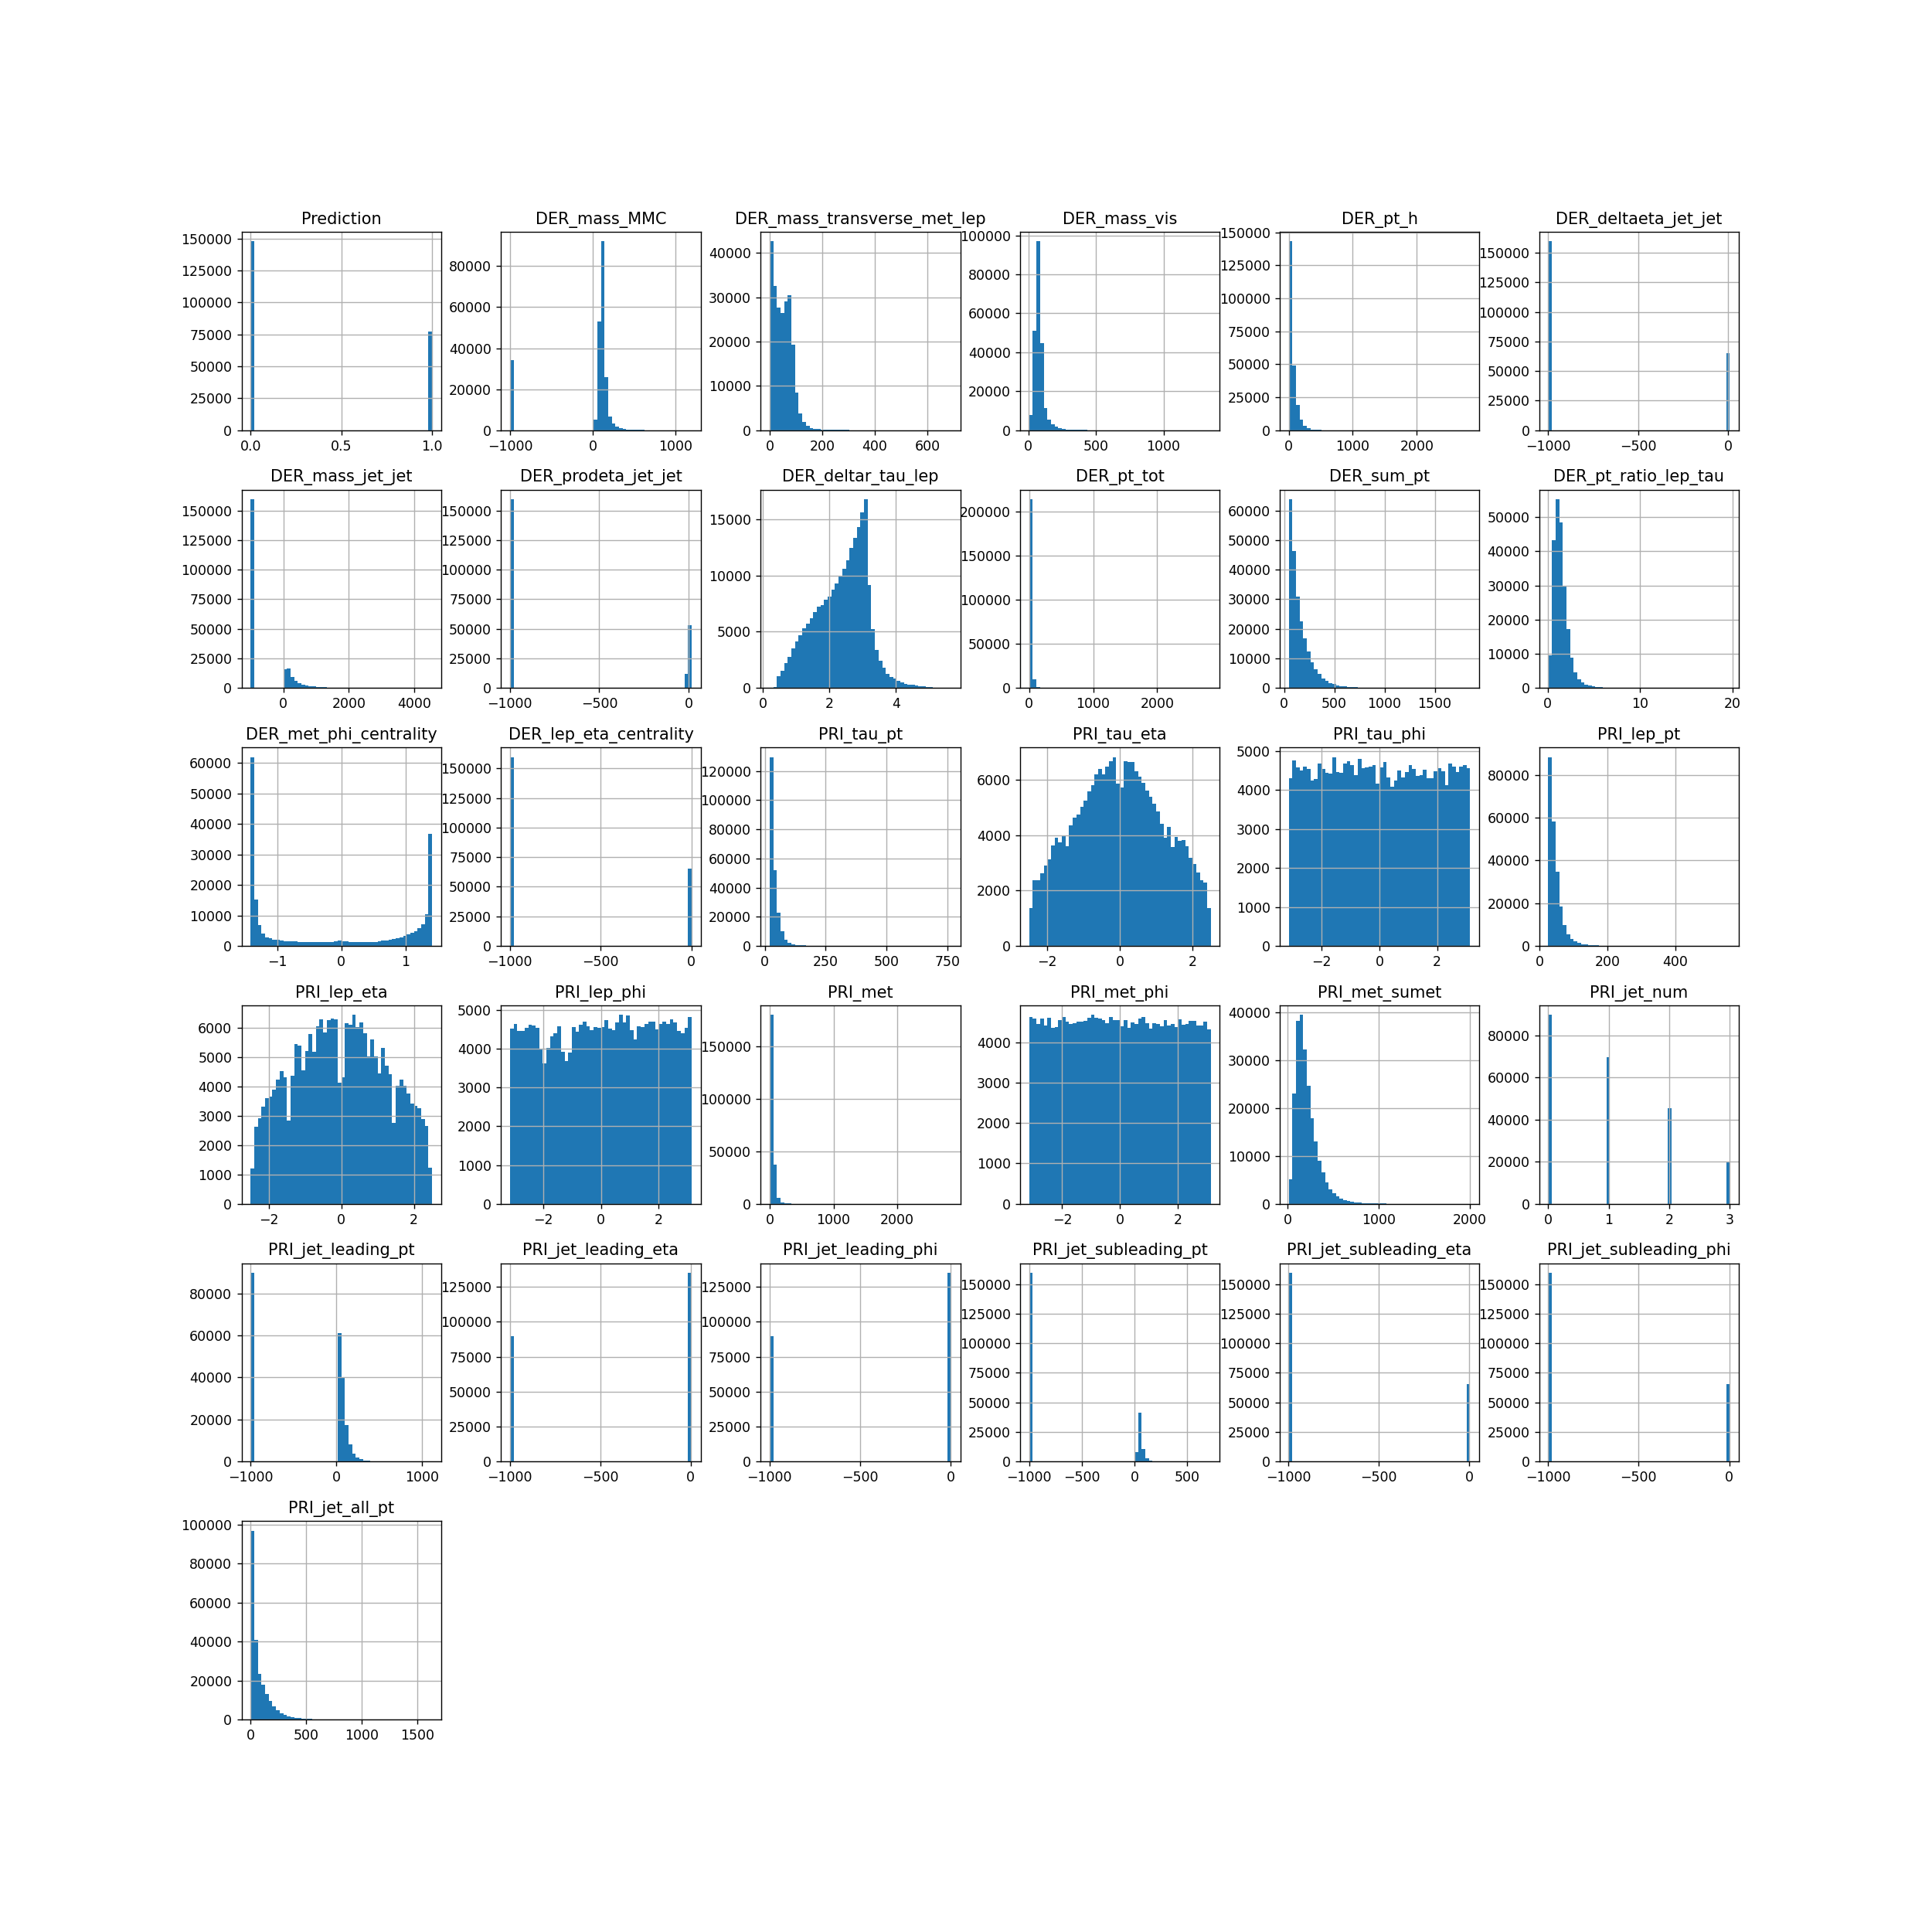

array([[<AxesSubplot:title={'center':'Prediction'}>,
        <AxesSubplot:title={'center':'DER_mass_MMC'}>,
        <AxesSubplot:title={'center':'DER_mass_transverse_met_lep'}>,
        <AxesSubplot:title={'center':'DER_mass_vis'}>,
        <AxesSubplot:title={'center':'DER_pt_h'}>,
        <AxesSubplot:title={'center':'DER_deltaeta_jet_jet'}>],
       [<AxesSubplot:title={'center':'DER_mass_jet_jet'}>,
        <AxesSubplot:title={'center':'DER_prodeta_jet_jet'}>,
        <AxesSubplot:title={'center':'DER_deltar_tau_lep'}>,
        <AxesSubplot:title={'center':'DER_pt_tot'}>,
        <AxesSubplot:title={'center':'DER_sum_pt'}>,
        <AxesSubplot:title={'center':'DER_pt_ratio_lep_tau'}>],
       [<AxesSubplot:title={'center':'DER_met_phi_centrality'}>,
        <AxesSubplot:title={'center':'DER_lep_eta_centrality'}>,
        <AxesSubplot:title={'center':'PRI_tau_pt'}>,
        <AxesSubplot:title={'center':'PRI_tau_eta'}>,
        <AxesSubplot:title={'center':'PRI_tau_phi'}>,
        <

In [7]:
df.hist(bins=50, figsize=(20,20))
#note how the -999.0 values correspond to "null"
# some features are quite useless on first sight
#also lots of fat-tail distributions 

In [8]:
df['Prediction'].value_counts()

0    147916
1     77084
Name: Prediction, dtype: int64

## Boxplot of all features

In [9]:
g = sns.boxplot(x="variable", y="value", data=pd.melt(df))
g.set_xticklabels(g.get_xticklabels(),rotation=70)

plt.show()
#plt.savefig("../EDA/boxplot.png")

## Histograms by prediction value

<IPython.core.display.Javascript object>


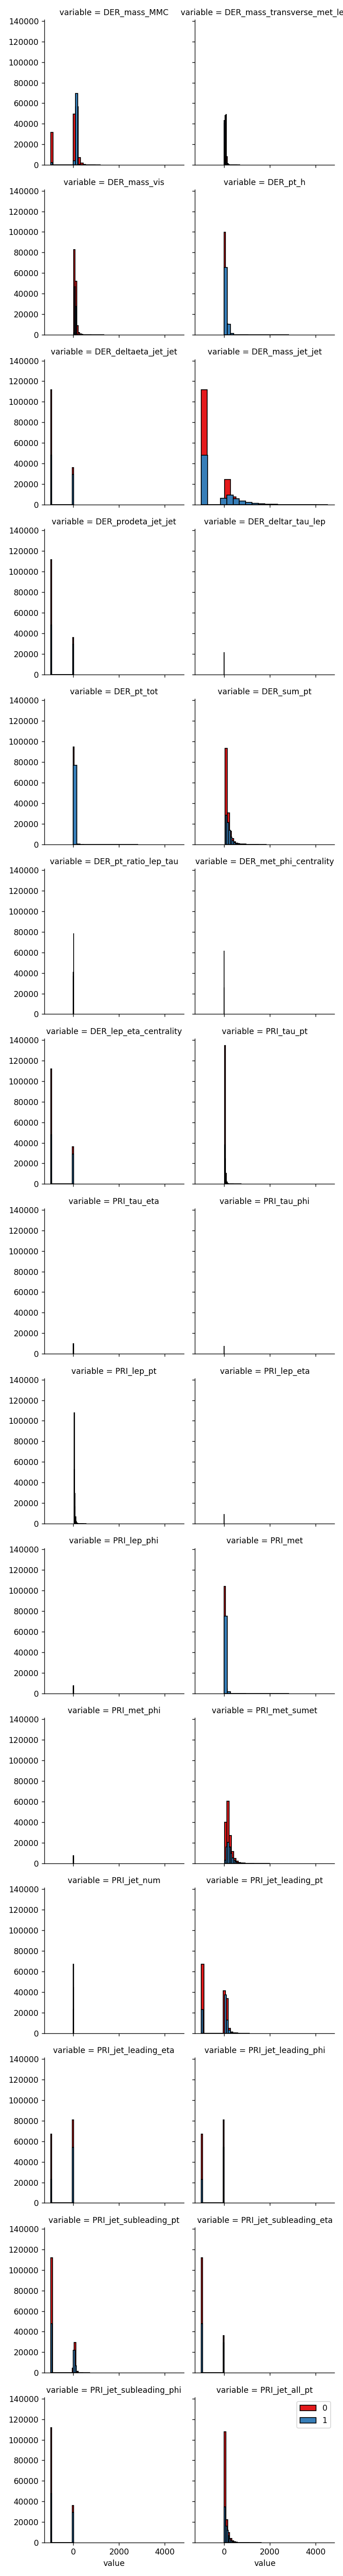

In [10]:
df2 = pd.melt(df, id_vars='Prediction')

bins=np.linspace(0, df2.value.max()/4, 100)
g = sns.FacetGrid(df2, col="variable", hue="Prediction", palette="Set1", col_wrap=2)
g.map(plt.hist, 'value', bins=20, ec="k")

g.axes[-1].legend()
plt.show()

## Start looking in detail to some interesting features

In [11]:
df.columns

Index(['Prediction', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [55]:
def hist_col_by_prediction(col,x_min=-1000, x_max =1000):
    df_col_1 = df.loc[df['Prediction']==1, col]
    df_col_0 = df.loc[df['Prediction']==0, col]
    kwargs = dict(alpha=0.5, bins=200)
    plt.figure(figsize=(5,2))
    plt.vlines(df_col_1.median(),0,30000)
    plt.hist(df_col_1, **kwargs, color='g', label='Signal')
    plt.hist(df_col_0, **kwargs, color='r', label='Background')
    plt.gca().set(title=col)
    plt.xlim(x_min,x_max)
    plt.legend()
    plt.show()



<IPython.core.display.Javascript object>


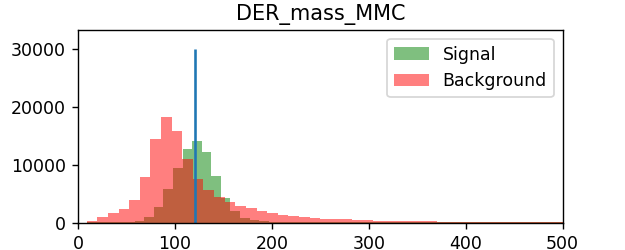

In [56]:
hist_col_by_prediction('DER_mass_MMC', 0,500) 
## SIGNALS VERY NARROW AROUND THEIR MEAN --> create similarity  feature? around mean of the signals? 

<IPython.core.display.Javascript object>


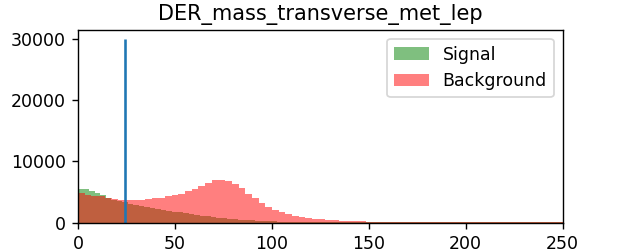

In [57]:
hist_col_by_prediction('DER_mass_transverse_met_lep', 0,250)

<IPython.core.display.Javascript object>


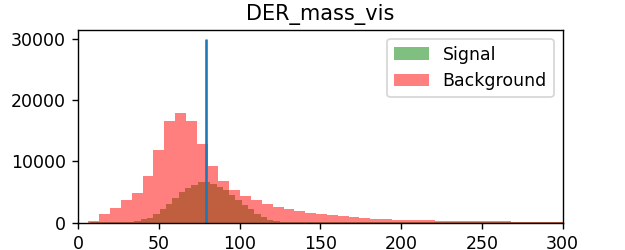

In [58]:
hist_col_by_prediction('DER_mass_vis',0,300)

<IPython.core.display.Javascript object>


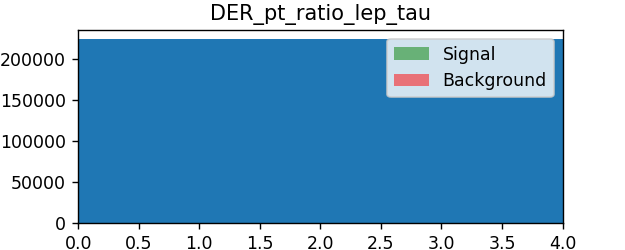

In [59]:
hist_col_by_prediction('DER_pt_ratio_lep_tau',0,4)

## Some Feature Engineering exploration

<IPython.core.display.Javascript object>


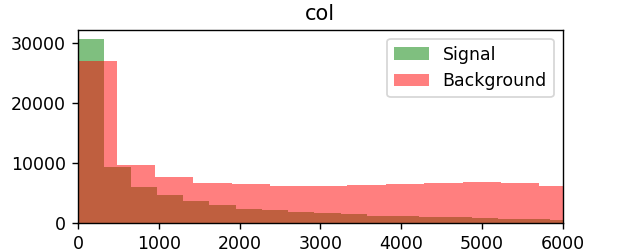

[ 8118.01      2710.555969 14360.187556 ...  6344.919025  1841.783056
  5246.829225]


In [66]:
col  = df['DER_mass_transverse_met_lep'].to_numpy()
y = df['Prediction'].to_numpy()
print(np.corrcoef(y,col))
cols = np.power(col,1/2)
print(np.corrcoef(y,cols))
col = np.power(col,2)
print(np.corrcoef(y,col))
disc  = col < 2500
print(np.corrcoef(y,disc))

[[ 1.         -0.35208672]
 [-0.35208672  1.        ]]
[[ 1.         -0.37090632]
 [-0.37090632  1.        ]]
[[ 1.         -0.20988188]
 [-0.20988188  1.        ]]
[[1.         0.37175937]
 [0.37175937 1.        ]]


<IPython.core.display.Javascript object>


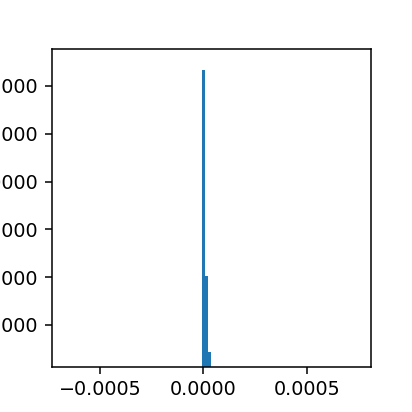

In [74]:
#col = (col-np.median(col))/np.std(col)
col = col / np.sum(col)
plt.figure(figsize=(3,3))
plt.hist(col,bins=100)
plt.gca()
plt.show()

## Correlation Heatmap

<IPython.core.display.Javascript object>


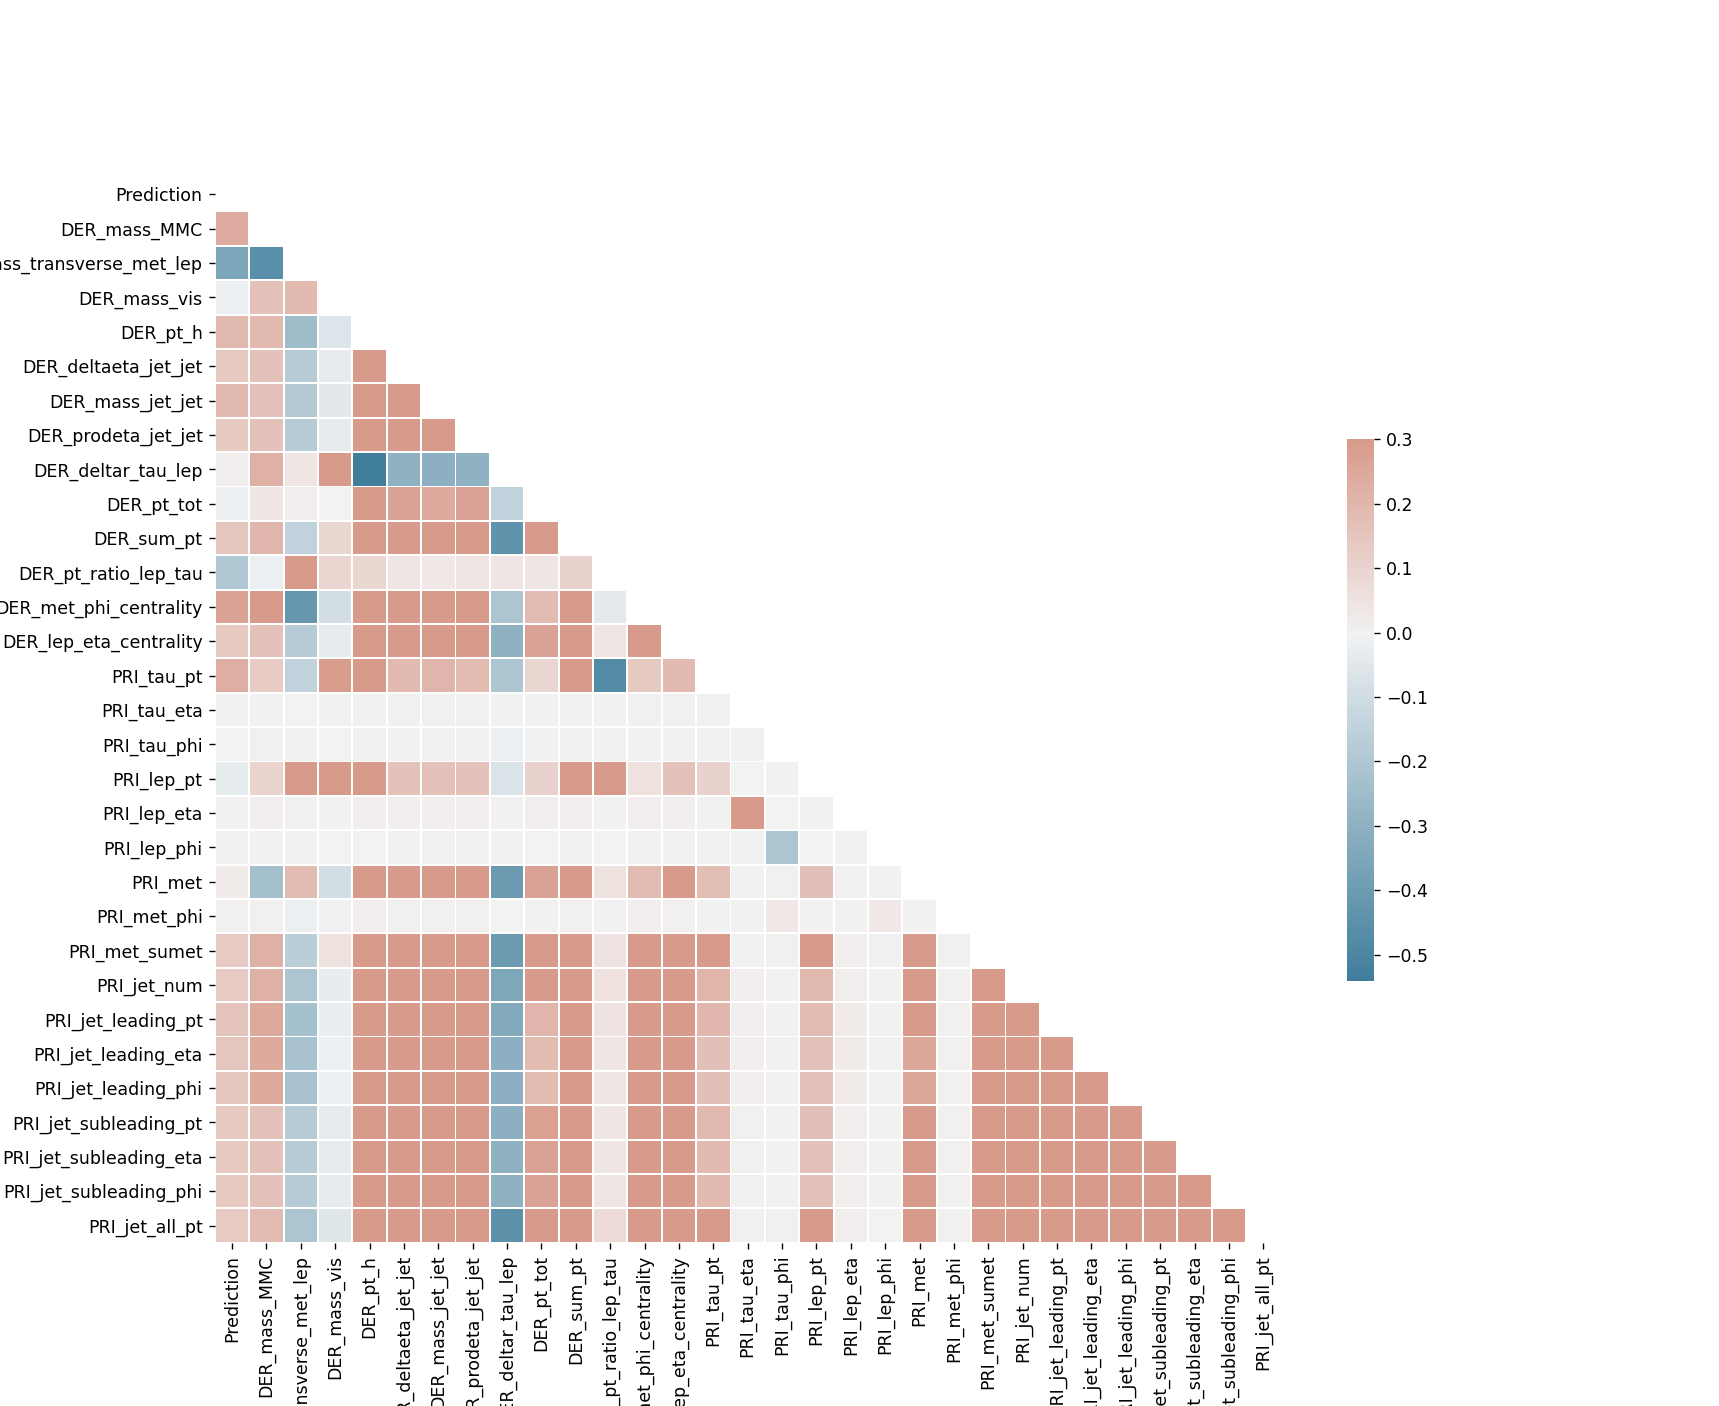

<AxesSubplot:>

In [11]:

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#plt.savefig("../EDA/heatmap.png")

In [12]:
corr["Prediction"]

Prediction                     1.000000
DER_mass_MMC                   0.239047
DER_mass_transverse_met_lep   -0.352087
DER_mass_vis                  -0.014419
DER_pt_h                       0.192022
DER_deltaeta_jet_jet           0.141426
DER_mass_jet_jet               0.191541
DER_prodeta_jet_jet            0.140334
DER_deltar_tau_lep             0.012354
DER_pt_tot                    -0.015022
DER_sum_pt                     0.152131
DER_pt_ratio_lep_tau          -0.194968
DER_met_phi_centrality         0.272097
DER_lep_eta_centrality         0.141124
PRI_tau_pt                     0.234128
PRI_tau_eta                   -0.000086
PRI_tau_phi                   -0.004143
PRI_lep_pt                    -0.032468
PRI_lep_eta                    0.001955
PRI_lep_phi                    0.003244
PRI_met                        0.022296
PRI_met_phi                    0.007339
PRI_met_sumet                  0.134872
PRI_jet_num                    0.133307
PRI_jet_leading_pt             0.157445


In [13]:
corr["PRI_jet_all_pt"]

Prediction                     0.133401
DER_mass_MMC                   0.184851
DER_mass_transverse_met_lep   -0.210731
DER_mass_vis                  -0.054103
DER_pt_h                       0.808107
DER_deltaeta_jet_jet           0.712561
DER_mass_jet_jet               0.719915
DER_prodeta_jet_jet            0.712731
DER_deltar_tau_lep            -0.449533
DER_pt_tot                     0.402520
DER_sum_pt                     0.965627
DER_pt_ratio_lep_tau           0.078621
DER_met_phi_centrality         0.452128
DER_lep_eta_centrality         0.712682
PRI_tau_pt                     0.322235
PRI_tau_eta                    0.005721
PRI_tau_phi                    0.004857
PRI_lep_pt                     0.294625
PRI_lep_eta                    0.011418
PRI_lep_phi                   -0.002127
PRI_met                        0.534609
PRI_met_phi                    0.007673
PRI_met_sumet                  0.884565
PRI_jet_num                    0.804521
PRI_jet_leading_pt             0.667439
